<a href="https://colab.research.google.com/github/Cristvillanueva/Simulaci-n-II/blob/main/Unidad%20II/Metodolog%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación y ejemplo de 3 lanzamientos de moneda

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Construya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

De la distribución binomial se tiene que:
\begin{equation*}
\begin{aligned}
\binom{n}{x}(p)^x(1-p)^{n-x} \\
\binom{3}{2}(0.5)^2(0.5)^1 = 0.375
\end{aligned}
\end{equation*}
Entonces, la probabilidad que caigan dos caras en 3 lanzamientos es:
\begin{equation*}
\begin{aligned}
\text{Probabilidad de 2 caras =} 0.375
\end{aligned}
\end{equation*}

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

Sea $X$ una variable aleatoria que determina la cantidad de caras que caen en 3 lanzamientos de una moneda, es decir
\begin{equation*}
\begin{aligned}
X = \{0,1,2,3\}
\end{aligned}
\end{equation*}

**PASO 2**. Formule la distribución de probabilidad de cada variable.


|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)|     0.5    |  0.5        |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |     0.5  |      0.5    |
|F(x)  |      0.5 |        1.0  |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|           |**Sol**|**Aguila**|
|-----------|-------|----------|
|f(x)       |   0.5    |        0.5  |
|F(x)       |    0.5   |    1.0      |
|Intervalos |    \[0, 0.499\]   |     \[0.5, 0.999\]     |

**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule un lanzamiento.

Si Número de caras = 2       

¿Aparecen dos caras? = **1**

Si Número de caras ≠ 2       

¿Aparecen dos caras? = **0**

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [51]:
def volados(n): #Esta función requiere la cantidad de lanzamientos de la moneda (n)
    caras = 0 #Necesitamos un contador que cuente la cantidad de caras que salieron en los n lanzamientos
    for i in range(n):
        u = random.uniform(0,1) #Generamos un aleatorio entre (0,1)
        if u <= 0.5: #Si el aleatorio generado anteriormente es menor o igual a 0.5, entonces significa que cayo cara la moneda
            caras += 1 #Si se cumple la condición anterior, entonces la cantidad de caras aumenta 1.
    return caras #Regresa el número de caras que salieron en n lanzamientos.


In [52]:
def caras(m): #Esta función requiere la cantidad de caras exactas a las cuales queremos calcularme la probabilidad de caer en n lanzamientos. 
    favorable = 0
    if volados(3) == m: #Si la función volados nos regresa exactamente la cantidad de caras que requerimos (m)
        favorable +=1 #Entonces el contador favorable ahora valdra 1
    return favorable #Regresa 1 si la condición se cumple, regresa 0 si no se cumple.

In [53]:
def experimento(iteraciones): #Esta función hara el lanzamiento de n monedas (en nuestro caso 3) cierta cantidad de veces (iteraciones)
    i = 0
    favorables=0  #Contador que nos dira en i iteración cuentas veces cayo m (2) caras en n (3) lanzamientos de moneda.
    Lista = [] #Guardara la probabilidad de caer m (2) caras en n (3) lanzamientos de moneda en la iteración i.
    while i <= iteraciones:
        favorables = favorables + caras(2)
        i += 1
        probabilidad = favorables/i #Calcula la probabilidad mencionada en Lista.
        Lista.append(probabilidad)
    return Lista #Regresa una lista de la probabilidad de caer m (2) caras en n (3) lanzamientos en cada iteración. 

In [54]:
exp = experimento(2000) #Hara el experimento antes descrito 2000 veces, es decir, nos dara 2000 probabilidades

In [55]:
np.mean(exp) #Saca la media de los experiemntos anteriores, eso nos dara una aproximación a la probabilidad.

0.40070428695998217

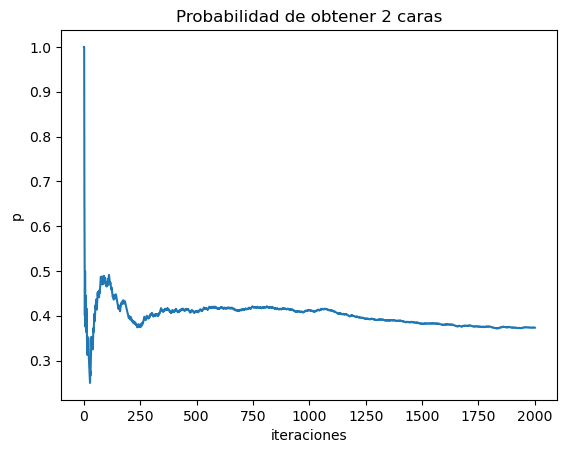

In [56]:
plt.plot(exp)  #Grafica la lista de probabilidades
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad de obtener 2 caras')
plt.show()

**PASO 8**. Replique el modelo.

In [57]:
def simulacion_caras(repeticiones): #Esta función hara la simulacion anterior muchas veces, es decir, hará "repeticiones" simulaciones.
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000))) #Calcula la media de 1000 experiementos unas N (repeticiones) cantidad de veces 
    return List #Nos regresa N (repeticiones) medias de 1000 experiemntos cada una.

In [58]:
N=100
simulacion = simulacion_caras(N)

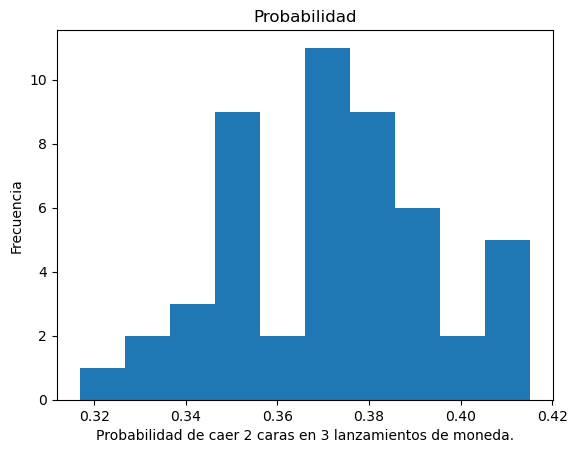

In [59]:
plt.hist(simulacion) #Grafica las frecuencias de la probabilidad de las N simualciones con 1000 experiemntos cada una en un histograma.
plt.xlabel('Probabilidad de caer 2 caras en 3 lanzamientos de moneda.')
plt.ylabel('Frecuencia')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación
estándar.

In [60]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza de la probabilidad de que aparezcan dos caras lanzando tres veces una moneda
al aire con un nivel de confianza del $95 \%$. Sabemos que para el intervalo de confianza:
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [61]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%



Entonces:  0.36652289521563536 < μ < 0.3787587812194017
